importing libraries

In [105]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

<h5>Importing files from directory<h5>

In [50]:
files = [file for file in os.listdir('./Sales_Data')]

In [52]:
list_of_dfs = []
all_months_data = pd.DataFrame()
for file in files:
    df1 = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df1])

In [53]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Task1. Clean up the data

In [55]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]

In [59]:
all_months_data = all_months_data.dropna(how='all')

In [60]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Task2. Adding month column, before I get month from the date I need to check if all dates are valid

In [78]:
try:
    pd.to_datetime(all_months_data["Order Date"])
    has_date_format = True
except ValueError:
    has_date_format = False

In [79]:
has_date_format

True

#### I see that the date has wrong format so I need to clean it, the problem is in the headers as they are duplicated, moving forward to check if Order_date count is the same as below function

In [71]:
all_months_data[all_months_data["Order Date"].str.len()<14]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [75]:
all_months_data = all_months_data[all_months_data["Order Date"]!="Order Date" ]

#### Now I can move forward as all the dates seems to be correct, I did not receive any error while parsing

In [92]:
all_months_data["Order Date"] = pd.to_datetime(all_months_data["Order Date"])

In [93]:
all_months_data["month"] = all_months_data["Order Date"].dt.month

### Correct datatypes to numbers so we can move to the next step

In [94]:
all_months_data["Quantity Ordered"] = pd.to_numeric(all_months_data["Quantity Ordered"])
all_months_data["Price Each"] = pd.to_numeric(all_months_data["Price Each"])

### Add sales columns so we can calculate sales

In [95]:
type(all_months_data["Quantity Ordered"].iloc[1])

numpy.int64

In [96]:
all_months_data["Sales"] = all_months_data["Quantity Ordered"] * all_months_data["Price Each"]

<h4>Question1. What was the best month for sales? How much was earned that month? <br><br> As we can see below the best month for sales was DECEMBER <h4>

In [118]:
results = all_months_data.groupby("month")["Sales"].sum()

In [119]:
results.idxmax()

12

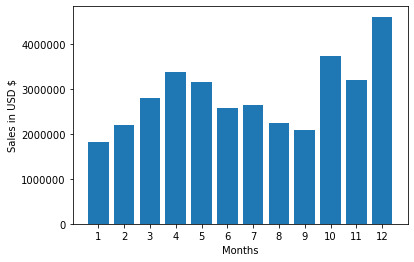

In [125]:
months = range(1,13)
plt.ticklabel_format(style='plain')
plt.bar(months,results)
plt.xticks(months)
plt.ylabel("Sales in USD $")
plt.xlabel("Months")
plt.show()

In [115]:
pd.options.display.float_format = '{:.2f}'.format